In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Platinum.csv')
df.head(5)

,Open,Close,High,Low,Date
0,933.5,930.5,933.5,930.5,1/1/2018
1,931.0,945.5,946.5,931.0,1/2/2018
2,945.0,957.0,961.0,940.5,1/3/2018
3,955.0,964.0,966.5,945.0,1/4/2018
4,963.0,969.5,970.5,959.5,1/5/2018


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Open,Close,High,Low,Date
2120,1038.5,1038.5,1038.5,1038.5,2024-06-01
2119,1028.0,1038.5,1051.5,1020.0,2024-05-31
2118,1040.0,1031.5,1043.0,1022.5,2024-05-30
2117,1061.5,1040.5,1064.0,1036.0,2024-05-29
2116,1056.0,1059.5,1068.0,1045.0,2024-05-28
...,...,...,...,...,...
4,963.0,969.5,970.5,959.5,2018-01-05
3,955.0,964.0,966.5,945.0,2018-01-04
2,945.0,957.0,961.0,940.5,2018-01-03
1,931.0,945.5,946.5,931.0,2018-01-02


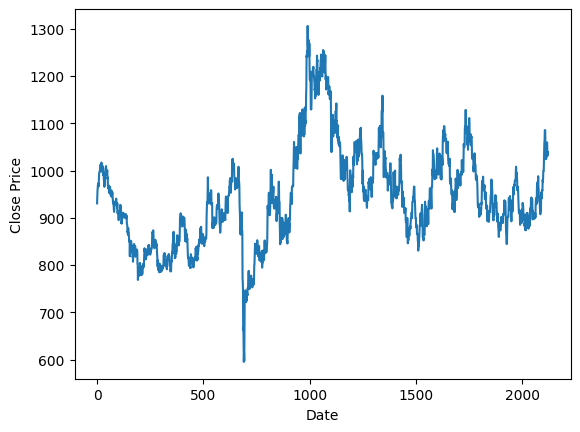

In [4]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [5]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,1038.5
1,1038.5
2,1031.5
3,1040.5
4,1059.5


In [6]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
# Chia train test theo tỉ lệ 7:3
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
train_data

array([[0.62376934],
       [0.62376934],
       [0.61392405],
       ...,
       [0.59985935],
       [0.60407876],
       [0.604782  ]])

In [9]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [10]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [11]:
X_test

array([[0.57594937, 0.60056259, 0.54852321, ..., 0.4697609 , 0.47046414,
        0.46835443],
       [0.60056259, 0.54852321, 0.53586498, ..., 0.47046414, 0.46835443,
        0.49226442],
       [0.54852321, 0.53586498, 0.54219409, ..., 0.46835443, 0.49226442,
        0.48312236],
       ...,
       [0.53656821, 0.54219409, 0.55625879, ..., 0.53164557, 0.52039381,
        0.52672293],
       [0.54219409, 0.55625879, 0.55555556, ..., 0.52039381, 0.52672293,
        0.51898734],
       [0.55625879, 0.55555556, 0.5625879 , ..., 0.52672293, 0.51898734,
        0.50914205]])

In [12]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1453, 30) (1453,)
(606, 30) (606,)


In [13]:
#Huấn luyện model SVR
model = SVR(kernel='linear', C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.01, kernel='linear')

In [14]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [15]:
y_pred

array([ 931.60307992,  938.89000626,  938.94621651,  927.86073579,
        905.14434555,  898.11443747,  892.65229696,  891.59509778,
        896.12554605,  900.92185544,  909.72619084,  909.46695518,
        912.66026745,  909.2762667 ,  900.02385554,  893.58977886,
        900.43951512,  896.21545778,  889.85229329,  888.16001239,
        900.46528465,  905.67894541,  909.91979832,  904.45477188,
        897.54038235,  888.63542464,  882.08181709,  877.8665611 ,
        869.22909185,  869.98447332,  878.4166269 ,  887.52286182,
        904.38046792,  921.41929467,  929.43869762,  935.83175481,
        943.18002685,  942.26859431,  926.71921034,  914.96759478,
        903.36756854,  896.45642803,  902.21358441,  912.09410394,
        918.76904322,  920.50932293,  912.30074568,  903.39732429,
        895.30588765,  892.19440923,  889.83449622,  887.66522429,
        883.07056798,  887.55411385,  890.79935478,  890.78371937,
        893.95217016,  891.16555597,  887.31462529,  879.44425

In [16]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.9995559379858954
Testing MSE: 751030.8882728526
Testing RMSE: 866.6203830241086


In [17]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.5625879  0.55766526 0.58227848 0.57243319 0.56610408 0.58016878
 0.58579466 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731
 0.58790436 0.58720113 0.57313643 0.57172996 0.56891702 0.56680731
 0.56469761 0.56329114 0.54922644 0.52883263 0.52320675 0.53164557
 0.52039381 0.52672293 0.51898734 0.50914205 0.49296765 0.4718706 ]
0 day output 0.4927619678915761
1 day input [0.55766526 0.58227848 0.57243319 0.56610408 0.58016878 0.58579466
 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436
 0.58720113 0.57313643 0.57172996 0.56891702 0.56680731 0.56469761
 0.56329114 0.54922644 0.52883263 0.52320675 0.53164557 0.52039381
 0.52672293 0.51898734 0.50914205 0.49296765 0.4718706  0.49276197]
1 day output 0.49424970507889376
2 day input [0.58227848 0.57243319 0.56610408 0.58016878 0.58579466 0.58579466
 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436 0.58720113
 0.57313643 0.57172996 0.56891702 0.56680731 0.56469761 0.56329114
 0.54922644 0.52883263 0.5

In [18]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
lags=30
i=0
while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.5625879  0.55766526 0.58227848 0.57243319 0.56610408 0.58016878
 0.58579466 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731
 0.58790436 0.58720113 0.57313643 0.57172996 0.56891702 0.56680731
 0.56469761 0.56329114 0.54922644 0.52883263 0.52320675 0.53164557
 0.52039381 0.52672293 0.51898734 0.50914205 0.49296765 0.4718706 ]
0 day output 0.4927619678915761
1 day input [0.55766526 0.58227848 0.57243319 0.56610408 0.58016878 0.58579466
 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436
 0.58720113 0.57313643 0.57172996 0.56891702 0.56680731 0.56469761
 0.56329114 0.54922644 0.52883263 0.52320675 0.53164557 0.52039381
 0.52672293 0.51898734 0.50914205 0.49296765 0.4718706  0.49276197]
1 day output 0.49424970507889376
2 day input [0.58227848 0.57243319 0.56610408 0.58016878 0.58579466 0.58579466
 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436 0.58720113
 0.57313643 0.57172996 0.56891702 0.56680731 0.56469761 0.56329114
 0.54922644 0.52883263 0.5

In [19]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
lags=30
i=0
while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.5625879  0.55766526 0.58227848 0.57243319 0.56610408 0.58016878
 0.58579466 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731
 0.58790436 0.58720113 0.57313643 0.57172996 0.56891702 0.56680731
 0.56469761 0.56329114 0.54922644 0.52883263 0.52320675 0.53164557
 0.52039381 0.52672293 0.51898734 0.50914205 0.49296765 0.4718706 ]
0 day output 0.4927619678915761
1 day input [0.55766526 0.58227848 0.57243319 0.56610408 0.58016878 0.58579466
 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436
 0.58720113 0.57313643 0.57172996 0.56891702 0.56680731 0.56469761
 0.56329114 0.54922644 0.52883263 0.52320675 0.53164557 0.52039381
 0.52672293 0.51898734 0.50914205 0.49296765 0.4718706  0.49276197]
1 day output 0.49424970507889376
2 day input [0.58227848 0.57243319 0.56610408 0.58016878 0.58579466 0.58579466
 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436 0.58720113
 0.57313643 0.57172996 0.56891702 0.56680731 0.56469761 0.56329114
 0.54922644 0.52883263 0.5

In [20]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

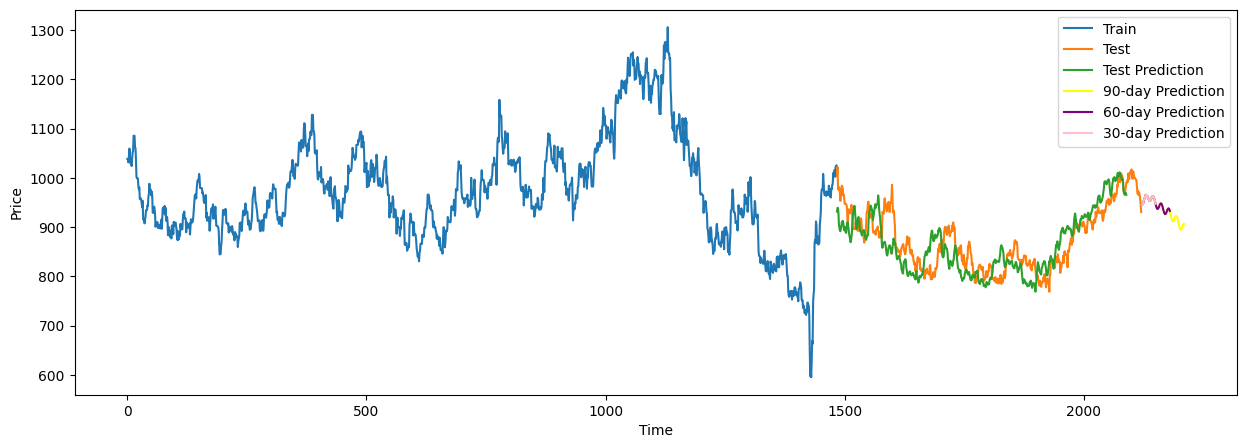

In [21]:
plt.figure(figsize=(15, 5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()